# Exercise Sheet I | Riddles

In [1]:
from algopy import graph, graphmat
from algopy.graph import Graph

In [2]:
from algopy import queue
from algopy.queue import Queue

We shall be first writing back load functions for graphs. First is he matrix-implementation version.

In [3]:
digraph1 = graph.loadgra("files/digraph1.gra")

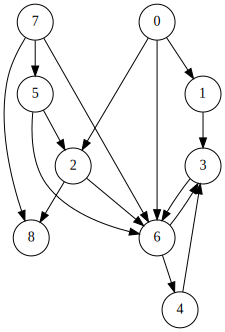

In [4]:
graph.display(digraph1)

In [5]:
euler10 = graph.loadgra("files/euler10.gra", multigraph=True)
euler10.directed

False

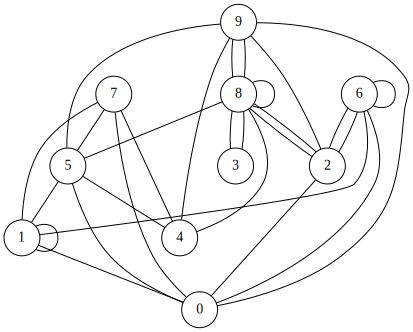

In [6]:
graph.display(euler10)

In [7]:
euler100 = graph.loadgra("files/eulerian100.gra", multigraph=True)

In [8]:
euler200 = graph.loadgra("files/eulerian200.gra", multigraph=True)

In [9]:
euler500 = graph.loadgra("files/eulerian500.gra", multigraph=True)

## 1. Searching for a path in a graph

There are two standard ways to do so 

* Using a BFS: One makes use of the vector of parents to get a chain between the two desired vertices.

* Using a DFS: Subtil use of returns of recursive call.

### BFS Style


In [10]:
def __path_BFS(G, s, t, P):
    q = Queue()
    q.enqueue(s)
    while not q.isempty():
        cur = q.dequeue()
        for v in G.adjlist[cur]:
            if not P[v]:
                P[v] = cur
                q.enqueue(v)
            if v == t:
                return True
    return False
            
def path_BFS(G, s, t):
    P = [None] * G.order
    P[s] = -1
    path = []
    if __path_BFS(G, s, t, P):
        while P[t] != -1:
            path.insert(0, t)
            t = P[t]
    return path

### DFS Style

In [11]:
def _path_dfs(G, src, dst, M, path):
    M[src] = True
    for adj in G.adjList[src]:
        if adj == dst or _path_dfs(G, adj, dst, M, path):
            path.insert(0, adj)
            return True
    return False
            
def path_dfs (G, src, dst):
    path = []
    M = [False]*G.order
    if _path_dfs(G, src, dst, M, path):
        path.insert(0, src)
    return path    

In [12]:
def _path_dfs(G, src, dst, M, path):
    M[src] = True
    for adj in G.adjList[src]:
        if adj == dst or _path_dfs(G, adj, dst, M, path):
            path.insert(0, adj)
            
def path_dfs (G, src, dst):
    path = []
    M = [False]*G.order
    _path_dfs(G, src, dst, M, path)
    return path    

## Exercise 2 | Eulerian Paths

Having an eulerian path in a graph is equivalent to the graph having no more than two vertices with odd degrees. 

In [13]:
def __is_eulerian(G, v, P, nbodd, nb):
    P[v] = True
    nb += 1
    d = 0
    for adj in G.adjlists[v]:
        if not P[adj]:
            ok, nbodd, nb = __is_eulerian(G, adj, P, nbodd, nb)
            if not ok:
                return False, nbodd, nb
        d += 1 + (adj == v) 
    if d % 2 == 1:
        nbodd += 1
        if nbodd > 2:
            return False, nbodd, nb
    return True, nbodd, nb
            
    
def is_eulerian(G):
    P = [False]*G.order
    boolean, nbodd, nb = __is_eulerian(G, 0, P, 0, 0)
    return boolean and G.order == nb

In [14]:
is_eulerian(euler10)

True

In [15]:
is_eulerian(euler100)

True

In [16]:
is_eulerian(euler500)

True

In [17]:
is_eulerian(euler200)

True

The below function assumes that you've copied your graph. It does go twice through the graph and once through the path. Going through the path it searches for each vertices for the existence of an adjacent vertex in the list.

In [18]:
def is_eulerian_path(G, path):
    """Tests whether a path is eulerian."""
    x = path[0]
    for i in range(1, len(path)):
        y = path[i]
        if not (y in G.adjlists[x]):
            return False
        G.adjlists[x].remove(y)
        if x != y:
            G.adjlists[y].remove(x)
        x = y
    for i in range(G.order):
        if G.adjlists[i]:
            return False
    return True

To avoid using the remove function which has a rather disturbing complexity, one can decide on building up the list of numbers of available arrows between two same vertices. In our case we'll be storing the adjacency matrix but in the case of sparse graphs we might want to store such numbers in a hash table.

We assume here that we have a graph matrix given in entry.

In [19]:
def test_euler_path(G_mat, path):
    x = path[0]
    for i in range(1, len(path)):
        y = path[i]
        if G.adj[x][y] == 0:
            return False
        G.adj[x][y] -= 1
        if x != y:
            G.adj[y][x] -= 1
        x = y
    for i in range(G.order):
        for j in range(i):
            if G.adj[i][j] != 0:
                return False
    return True

** Remark : Using *%time* magic command.**

In [20]:
%%time
n = 10000
L = []
for i in range(n):
    L.append(i*i)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 5.63 ms


In [21]:
%%time
M = [i*i for i in range(n)]

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 786 µs


In [22]:
import numpy as np

In [23]:
%%time
V = np.arange(n)
V_square = V*V

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 1.38 ms


In [24]:
%%time
V_square = V*V

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.63 ms


## Exercise 2.3 | Subgraph

In [25]:
def subgraph(G, s, d):
    """Builds up the subgraph of vertices at distance <= d from s."""
    dist = [-1]*G.order
    mapping = [-1]*G.order
    parents = [None]*G.order
    dist[s] = 0
    mapping[s] = 0
    
    subG = graph.Graph(1, G.directed)
    q = Queue()
    q.enqueue(s)
    while not q.isempty():
        s = q.dequeue()
        for adj in G.adjlists[s]:
            if dist[adj] == -1 and dist[s] < d:
                # Map and mark
                mapping[adj] = subG.order
                dist[adj] = dist[s] + 1
                parents[adj] = s
                # Build up subgraph structure
                subG.addvertex()
                subG.addedge(mapping[s], mapping[adj], multi=False)
                # Enqueue adjacent vertex
                q.enqueue(adj)
            elif dist[adj] != -1:
                # Issue relative to the implementation we have:
                # addedge takes care of oriented or not case on its 
                # own
                if G.directed or parents[s] != adj:
                    subG.addedge(mapping[s], mapping[adj], multi=False)
    return(subG, mapping, dist)                

In [26]:
subg, mapping, _ = subgraph(euler10, 0, 2)
mapping

[0, 1, 2, -1, 8, 3, 4, 5, 7, 6]

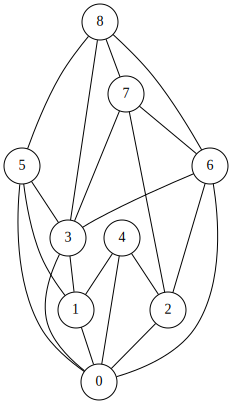

In [27]:
graph.display(subg)

The previous implementation is too heavy by one factor: the list of distances. This was initially used as a paint vector. The point is that we need to detect visiting a vertex out of one of its child in the covering forest. This is related to the implementation of addedge which takes care of oriented case on its own. Here is a slight modification to avoid using an extra paint vector.

In [28]:
def subgraph(G, s, d):
    """Builds up the subgraph of vertices at distance <= d from s."""
    mapping = [-1]*G.order
    parents = [None]*G.order
    parents[s] = -1
    
    subG = graph.Graph(1, G.directed)
    mapping[s] = 0
    dist = 0
    
    q = Queue()
    f = Queue()
    q.enqueue(s)
    
    while not q.isempty():
        s = q.dequeue()
        for adj in G.adjlists[s]:
            if (parents[adj] is None) and dist < d:
                # Map and mark
                mapping[adj] = subG.order
                parents[adj] = s
                # Build up subgraph structure
                subG.addvertex()
                subG.addedge(mapping[s], mapping[adj], multi=False)
                # Enqueue adjacent vertex in next level queue
                f.enqueue(adj)
            elif parents[adj] != None:
                # Issue relative to the implementation we have:
                # addedge takes care of oriented or not case on its 
                # own
                if G.directed or parents[s] != adj:
                    subG.addedge(mapping[s], mapping[adj], multi=False)
            
            # Checking if we've finished going through current level
        if q.isempty():
            f, q = q, f
            dist += 1
       
    return(subG, mapping, dist)                

In [29]:
subg, mapping, _ = subgraph(euler10, 0, 2)
mapping

[0, 1, 2, -1, 8, 3, 4, 5, 7, 6]

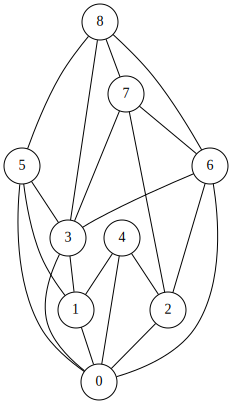

In [30]:
graph.display(subg)

## Exerise 2.4 | DDI (HID).

In [37]:
def indegrees(G):
    """Computes inner degrees of vertices of a graph."""
    res = [0] * G.order
    for v in range(G.order):
        for succ in G.adjlists[v]:
            res[succ] += 1
    return res

In [38]:
indegrees?

In [40]:
graph.loadgra??

In [33]:
digraph_topo = graph.loadgra("files/digraph_topo.gra")

In [34]:
indegrees(digraph_topo)

[0, 2, 1, 1, 0, 3, 2, 1, 2]

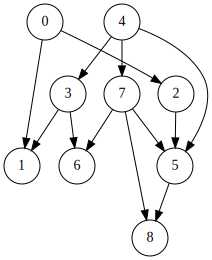

In [35]:
graph.display(digraph_topo)

In [44]:
def topo_sort(G):
    """Builds up a topological sort of graph if there are no circuits."""
    # Build up list of indegrees
    in_degrees = indegrees(G)
    # Initilialize queue for sort
    sort = Queue()
    # Going G.order times through the list of in_degrees each time enqueuing 
    # one vertex per loop or raising an exception.
    for _ in range(G.order):
        v = 0
        while v < G.order and in_degrees[v]:
            v += 1
        if v == G.order: # Case where no zero indegrees
            raise Exception("Graph does have a circuit.")
        sort.enqueue(v)
        in_degrees[v] = -1
        for adj in G.adjlists[v]:
            in_degrees[adj] -= 1  # Take out one from outerdegrees of v
    return sort

In [45]:
sort = topo_sort(digraph_topo)
while not sort.isempty():
    v = sort.dequeue()
    print(v, end=" ")

0 2 4 3 1 7 5 6 8 